# Preiskovanje v globino in v širino

Recimo, da imamo rodbino, takšno kot v rednem delu predavanj.

In [1]:
otroci = {
    "Adam": ["Matjaž", "Cilka", "Daniel"],
    "Aleksander": [],
    "Alenka": [],
    "Barbara": [],
    "Cilka": [],
    "Daniel": ["Elizabeta", "Hans"],
    "Erik": [],
    "Elizabeta": ["Ludvik", "Jurij", "Barbara"],
    "Franc": [],
    "Herman": ["Margareta"],
    "Hans": ["Herman", "Erik"],
    "Jožef": ["Alenka", "Aleksander", "Petra"],
    "Jurij": ["Franc", "Jožef"],
    "Ludvik": [],
    "Margareta": [],
    "Matjaž": ["Viljem"],
    "Petra": [],
    "Tadeja": [],
    "Viljem": ["Tadeja"],
}

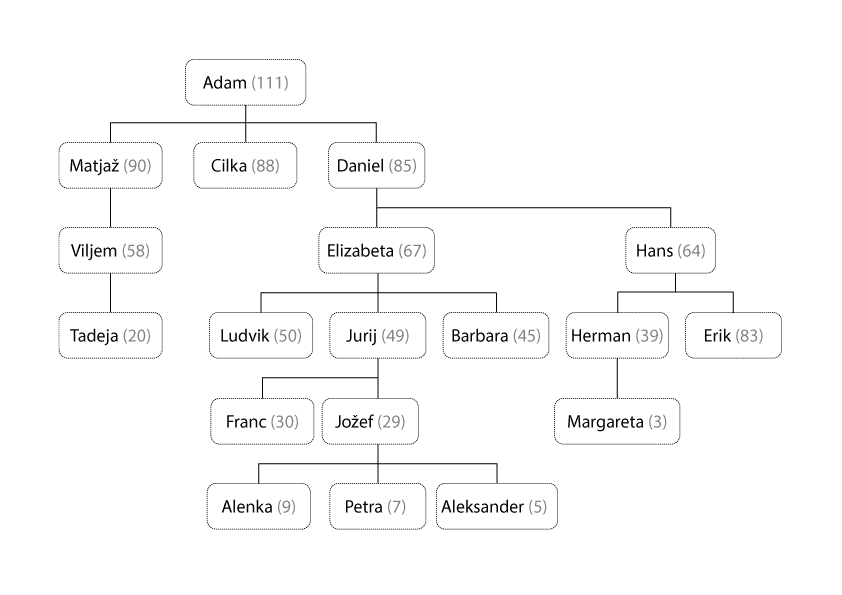

Recimo, da hočemo izpisati vsa imena v rodbini določenega človeka. In to brez rekurzije.

### V globino

Pomagamo si s seznamom `izpisati`, v katerem beležimo vse, ki jih je potrebno še pregledati. V vsakem koraku zanke vzamemo iz seznama naslednjo osebo, jo izpišemo, v seznam teh, ki jih je potrebno še pregledati, pa dodamo vse njegove otroke. To počnemo, dokler na pregled ne čaka nihče več.

In [2]:
pregledati = ["Adam"]
while pregledati:
    oseba = pregledati.pop()
    pregledati += otroci[oseba]
    print(oseba)

V kakšnem vrstnem redu se je izpisala rodbina? Nekako od zgoraj in z desne. Kar sledite imenom po drevesu.

Kaj se dogaja, bomo najlepše videli, če poleg osebe izpisujemo še, kaj je potrebno pregledati.

In [3]:
pregledati = ["Adam"]
while pregledati:
    oseba = pregledati.pop()
    pregledati += otroci[oseba]
    print(oseba, pregledati)

- Ko izpišemo Adama, si zabeležimo, da je potrebno pregledati pe njegove otroke.
- Nato vzamemo zadnji element seznama, torej Adamovega zadnjega otroka, Daniela. Izpišemo ga in dodamo vse njegove otroke.
- Vzamemo zadnji element seznama, torej zadnjega Danielovega otroka. Izpišemo ga in dodamo njegove otroke. (Samo, da jih slučajno nima.)

In to je to: Adamovi preostali otroci bodo prišli na vrsto šele, ko bomo izpisali vse Danielovi. Danielovi preostali otroci bodo prišli na vrsto šele, ko bomo izpisali vse Hansove ...

Program se torej zapodi v globino: dokler je opravi z desno polovico drevesa, se ne bo lotil leve.

Ta vrstni red je malo hecen, boljše bi ilo iti leve proti desni. To lahko dosežemo tako, da otroke dodajamo v obratnem vrstnem redu.

In [4]:
izpisati = ["Adam"]
while izpisati:
    oseba = izpisati.pop()
    print(oseba)
    izpisati += otroci[oseba][::-1]

### Po nivojih

Kaj pa če bi hoteli izpisovati drevo po nivojih? Najprej Adama, nato vse njegove otroke, nato otroke njegovih otrok in tako navzdol?

Gornji program deluje tako, da tisti, ki je prišel kasneje, pride na vrsto prej: nove osebe zlagamo na konec seznama in vsako naslednjo osebo s `pop` poberemo s konca seznama. Če jih hočemo izpisovati po vrsti, jih moramo po vrsti tudi jemati: kdor prej pride v seznam, pride tudi prej na vrsto.

To bomo dosegli tako, da bomo namesto `pop()` poklicali `pop(0)`.

In [5]:
izpisati = ["Adam"]
while izpisati:
    oseba = izpisati.pop(0)
    print(oseba)
    izpisati += otroci[oseba]

V prvem primeru rečemo, da smo drevo preiskovali v globino, v drugem v širino.

V prvem primeru je `izpisati` predstavljal sklad (`stack`). Sklad je podatkovna struktura, iz katere jemljemo v obratnem vrstnem redu od dodajanja. Ime je dobil po tem, da tudi takrat, ko zlagamo neke stvari eno na drugo (recimo krožnike, knjige...), najprej vzamemo s kupa tisto stvar, ki smo jo dodali zadnjo.

V drugem primeru `izpisati` uporabljamo kot vrsto (`queue`). Kdor prej pride, prej melje.

Manjši problem vrste, če jo uporabljamo na ta način in v Pythonu, je, da je `pop(0)` počasen, ker mora premakniti vse elemente vrste za eno mesto. Hitrejši način je, da pustimo elemente vrste pri miru.

In [6]:
izpisati = ["Adam"]

i = 0
while i < len(izpisati):
    oseba = izpisati[i]
    izpisati += otroci[oseba]
    print(oseba)
    i += 1

V Pythonu lahko za to pravzaprav uporabimo kar zanko `for`. Če jo spustimo prek seznama, ki ga znotraj zanke dopolnjujemo, bo tekla tudi čez dodane elemente.

In [7]:
izpisati = ["Adam"]

for oseba in izpisati:
    izpisati += otroci[oseba]
    print(oseba)

### Rekurzija?

Z rekurzijo bomo skoraj vedno iskali v globino. Običajna rekurzivna rešitev,

In [8]:
def izpisi(oseba):
    print(oseba)
    for otrok in otroci[oseba]:
        izpisi(otrok)
        
izpisi("Adam")

Adam
Matjaž
Viljem
Tadeja
Cilka
Daniel
Elizabeta
Ludvik
Jurij
Franc
Jožef
Alenka
Aleksander
Petra
Barbara
Hans
Herman
Margareta
Erik


dela praktično isto kot naša različica s skladom (tudi vrstni red je enak kot pri programu, v katerem smo vstavljali otroke v obratnem vrstnem redu). Rekurzija torej praktično vedno išče v globino. Iskanje v širino je z rekurzijo precej zoprno narediti.

## Iskanje poti

Zdaj pa podobna, a malo drugačna naloga: namesto rodbine imamo poznanstva. Za vsako osebo vemo, koga pozna.

In [9]:
znanci = {
    "Ana": {"Cilka", "Dani", "Micka"},
    "Berta": {"Ema", "Nina", "Helga"},
    "Cilka": {"Ana", "Micka", "Klara"},
    "Dani": {"Ana", "Greta"},
    "Ema": {"Nina", "Berta"},
    "Fanči": {"Greta", "Liza"},
    "Greta": {"Dani", "Fanči"},
    "Helga": {"Berta", "Iva"},
    "Iva": {"Nina", "Helga"},
    "Jana": {"Klara", "Liza"},
    "Klara": {"Cilka", "Liza", "Jana"},
    "Liza": {"Fanči", "Micka", "Jana"},
    "Micka": {"Ana", "Cilka", "Liza"},
    "Nina": {"Ema", "Berta", "Iva"}
}

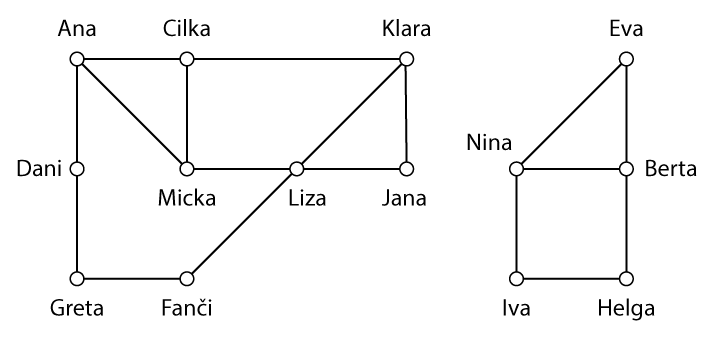

Napisati želimo funkcijo, ki ji podamo dve osebi, in pove, ali obstaja veriga poznanstev med njima. Tako obstaja veriga od Ane do Jane, od Ane do Nine pa ne.

In [21]:
def pozna(oseba1, oseba2):
    if oseba1 == oseba2:
        return True
    for znanec in znanci[oseba1]:
        if pozna(znanec, oseba2):
            return True
    return False

pozna("Ana", "Greta")

RecursionError: maximum recursion depth exceeded in comparison

Ta funkcija je v bistvu enaka funkciji, s katero smo iskali, ali v rodbini določene osebe obstaja določena druga oseba. Le da je tam delovala - tu pa ne. Zacikla se. Ana pozna Cilko, Cilka pozna Micko, Micka Ano in tako naprej. Lahko se zgodi, da slučajno pririne ravno do iskane osebe. Večinoma pa se zaključi, ko je rekurzija globoka 1000 nivojev in Python oceni, da je nekaj narobe.

Reč poflikamo tako, da beležimo pot, po kateri smo prehodili, in prepovedujemo ponovno pregledovati osebe, ki so že na poti.

In [11]:
def pozna(oseba1, oseba2, pot=()):
    pot += (oseba1, )
    if oseba1 == oseba2:
        return pot
    for znanec in znanci[oseba1]:
        if znanec not in pot:
            pot_do = pozna(znanec, oseba2, pot)
            if pot_do:
                return pot_do
    return None

Mimogrede smo to pot zapisali kot terko in jo vrnemo kot rezultat funkcije. Tako ne vemo le, ali obstaja povezava med določenim parom oseb, temveč tudi, prek katerih oseb teče.

In [12]:
pozna("Ana", "Jana")

('Ana', 'Micka', 'Liza', 'Jana')

In [13]:
pozna("Ana", "Greta")

('Ana', 'Micka', 'Liza', 'Fanči', 'Greta')

To deluje, le pot, ki jo vrne, ni nujno najkrajša. Zakaj? No, zato, ker se zato niti nismo trudili.

Če hočemo najkrajšo pot, moramo iskati v širino. Najprej moramo preiskati znance prve osebe, nato znance teh znancev ... Tako kot smo prejle delali v rodbinskem drevesu.

In [14]:
def pozna(oseba1, oseba2):
    preiskati = [oseba1]
    for oseba in preiskati:
        if oseba == oseba2:
            return True
        for znanec in znanci[oseba]:
            if znanec not in preiskati:
                preiskati.append(znanec)
    return False

In [15]:
pozna("Ana", "Jana")

True

In [16]:
pozna("Ana", "Nina")

False

Osnovna razlika med to rešitvijo in prejšnjo, rekurzivno, je v tem, da rekurzivna vsakega znanca preišče takoj, ta pa ga doda v vrsto, tako da bodo prej na vrsti tisti, ki so tudi prej prišli.

Vendar ta funkcija pove le, ali med dvema osebama obstaja pot ali ne, ne vrne pa poti. Lotili pa smo se je prav zato, da bi izvedeli najkrajšo pot.

Do poti bomo prišli tako, da si za vsako osebo zapomnimo, od katere osebe smo prišli do nje. Ko pridemo do ciljne osebe, potem prehodimo pot nazaj.

In [17]:
def pozna(oseba1, oseba2):
    preiskati = [oseba1]
    pot_do = {}
    for oseba in preiskati:
        if oseba == oseba2:
            break
        for znanec in znanci[oseba]:
            if znanec not in pot_do:
                pot_do[znanec] = oseba  # osebo `oseba` prvič srečamo med znanci `znanec`
                preiskati.append(znanec)
    else:
        return None  # znotraj zanke se ni zgodil break -> oseba2 ni dosegljiva
        
    pot = [oseba2]  # ritensko sestavljamo pot; prva je oseba2
    while pot[-1] != oseba1:  # če na koncu seznama še ni oseba1
        pot.append(pot_do[pot[-1]])  # dodamo osebo, od katere smo prišli do zadnje v seznamu
    return pot[::-1]  # in potem vrnemo ta seznam, obrnjen nazaj

In [18]:
pozna("Ana", "Jana")

['Ana', 'Micka', 'Liza', 'Jana']

In [19]:
pozna("Ana", "Greta")

['Ana', 'Dani', 'Greta']

Odtod nismo več daleč od Dijsktrovega algoritma za iskanje najkrajših poti. Vendar s tem počakajte do drugega letnika.